In [ ]:
!pip install ta

In [52]:
import pandas as pd
import os
import numpy as np
from ta import add_all_ta_features
from ta.trend import EMAIndicator, MACD
from ta.momentum import RSIIndicator, StochasticOscillator, ROCIndicator
from ta.volatility import BollingerBands, AverageTrueRange
from ta.volume import OnBalanceVolumeIndicator, VolumeWeightedAveragePrice
from ta.utils import dropna
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#load data
df = pd.read_csv('./archive/sp500_stocks.csv', sep=',')
df = dropna(df)

company_df = pd.read_csv('./archive/sp500_companies.csv', sep=',')
companies = company_df["Symbol"]
#print(companies)
companies = companies.tolist
#print(companies)

company_split = {company: df[df["Symbol"] == company] for company in df["Symbol"].unique()}
for group, sub_df in company_split.items():
    
    print(f"Group {group}:\n{sub_df}\n")

    # Exponential Moving Averages
    ema15 = EMAIndicator(close=sub_df["Close"], window=15).ema_indicator()
    ema50 = EMAIndicator(close=sub_df["Close"], window=50).ema_indicator()
    sub_df["ema15"] = ema15
    sub_df["ema50"] = ema50

    # MACD
    macd = MACD(close=sub_df["Close"], window_slow=26, window_fast=12, window_sign=9)
    sub_df['macd'] = macd.macd()
    sub_df['macd_signal'] = macd.macd_signal()

    # Bollinger Bands
    bb = BollingerBands(close=sub_df["Close"], window=20, window_dev=2)
    sub_df['bb_bbm'] = bb.bollinger_mavg()
    sub_df['bb_bbh'] = bb.bollinger_hband()
    sub_df['bb_bbl'] = bb.bollinger_lband()

    # RSI
    rsi = RSIIndicator(close=sub_df["Close"], window=14).rsi()
    sub_df["rsi"] = rsi

    # Stochastic Oscillator
    sto_osc = StochasticOscillator(high=sub_df["High"], low=sub_df["Low"], close=sub_df["Close"], window=14, smooth_window=3)
    sub_df["stoch_k"] = sto_osc.stoch()
    sub_df["stoch_d"] = sto_osc.stoch_signal()

    # Average True Range
    atr = AverageTrueRange(high=sub_df["High"], low=sub_df["Low"], close=sub_df["Close"], window=14).average_true_range()
    sub_df["atr_14"] = atr

    # On Balance Volume
    obv = OnBalanceVolumeIndicator(close=sub_df["Close"], volume=sub_df["Volume"]).on_balance_volume()
    sub_df["obv"] = obv

    # Volume Weighted Average Price
    vwap = VolumeWeightedAveragePrice(high=sub_df["High"], low=sub_df["Low"], close=sub_df["Close"], volume=sub_df["Volume"]).volume_weighted_average_price()
    sub_df["vwap"] = vwap

    # Rate of Change
    roc = ROCIndicator(close=sub_df["Close"], window=10).roc()
    sub_df["roc_10"] = roc

    # Increase
    sub_df["Target"] = (sub_df["Close"].shift(-1) > sub_df["Close"]).astype(int)

    # Clopen
    sub_df["Clopen"] = sub_df["Close"]/sub_df["Open"]

    # High/Low
    sub_df["HighLow"] = sub_df["High"]/sub_df["Low"]

    # Log Change
    sub_df["log_price"] = np.log(sub_df["Close"])
    sub_df["Log5"] = sub_df["log_price"] - sub_df["log_price"].shift(5)
    sub_df["Log15"] = sub_df["log_price"] - sub_df["log_price"].shift(15)
    sub_df["Log30"] = sub_df["log_price"] - sub_df["log_price"].shift(30)
    
    # percent change
    sub_df['Pct_Change'] = (sub_df['Close'].shift(-1) - sub_df['Close']) / sub_df['Close']

    print(sub_df.head(), group)
    sub_df.to_csv("{}.csv".format(group), index=False)


In [3]:
stock_folder = "./clean_data"
stock_files = [f for f in os.listdir(stock_folder) if f.endswith('.csv')]
print(stock_files)
dataframes = []

for file in stock_files:
    file_path = os.path.join(stock_folder, file)
    print(file, file_path)
    df = pd.read_csv(file_path)
    df['Ticker'] = file.split('.')[0]
    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)
merged_df.to_csv('merged_data.csv', index=False)

['CSCO.csv', 'UAL.csv', 'ISRG.csv', 'CE.csv', 'VRTX.csv', 'EQIX.csv', 'PODD.csv', 'V.csv', 'FOX.csv', 'MO.csv', 'ENPH.csv', 'EIX.csv', 'BBY.csv', 'HCA.csv', 'AJG.csv', 'DTE.csv', 'C.csv', 'T.csv', 'APH.csv', 'MSI.csv', 'FCX.csv', 'ADM.csv', 'LH.csv', 'SOLV.csv', 'BLDR.csv', 'GPN.csv', 'PPG.csv', 'IRM.csv', 'IQV.csv', 'ESS.csv', 'STZ.csv', 'PARA.csv', 'TDG.csv', 'TSN.csv', 'PEP.csv', 'PEG.csv', 'DLR.csv', 'FAST.csv', 'TJX.csv', 'MRK.csv', 'ALLE.csv', 'ABBV.csv', 'ORCL.csv', 'SBUX.csv', 'IR.csv', 'DPZ.csv', 'CAT.csv', 'MCD.csv', 'AMZN.csv', 'GLW.csv', 'BDX.csv', 'CSGP.csv', 'PWR.csv', 'DXCM.csv', 'WELL.csv', 'VRSK.csv', 'FTNT.csv', 'DHI.csv', 'ED.csv', 'INVH.csv', 'IP.csv', 'EXPE.csv', 'RVTY.csv', 'WDC.csv', 'UPS.csv', 'MSFT.csv', 'ANSS.csv', 'UDR.csv', 'WEC.csv', 'UBER.csv', 'SHW.csv', 'CCL.csv', 'EA.csv', 'DE.csv', 'VLTO.csv', 'NDAQ.csv', 'RTX.csv', 'PNC.csv', 'KMX.csv', 'NVDA.csv', 'ALB.csv', 'VLO.csv', 'FDX.csv', 'DG.csv', 'HIG.csv', 'INCY.csv', 'HSIC.csv', 'AXP.csv', 'HPE.csv', 'DFS

In [10]:
stock_data = pd.read_csv('./merged_data.csv')
stock_data = stock_data.dropna()
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day
stock_data = stock_data.drop('Date', axis=1)
stock_data = stock_data.drop('Symbol', axis=1)
stock_data = stock_data.drop('Ticker', axis=1)
stock_data = stock_data.drop('Pct_Change', axis=1) # for the decision trees, we have to remove this
X = stock_data.drop('Target', axis=1)
y = stock_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train))

456918


In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=20, max_features=None, min_samples_leaf=4, min_samples_split=10)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

plot_tree(dt_classifier)

train_y_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)
print(f"Train Accuracy: {train_accuracy}")


# get the most important features
importances = dt_classifier.feature_importances_

# Rank features
feature_importance = pd.Series(importances, index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')

Test Accuracy: 0.5856039814583799
Train Accuracy: 0.7706612565055436


<Axes: >

Error in callback <function flush_figures at 0x177ad0a40> (for post_execute):


KeyboardInterrupt: 

Test Accuracy (RF): 0.5789922918335456
Train Accuracy (RF): 0.89336817547131
features


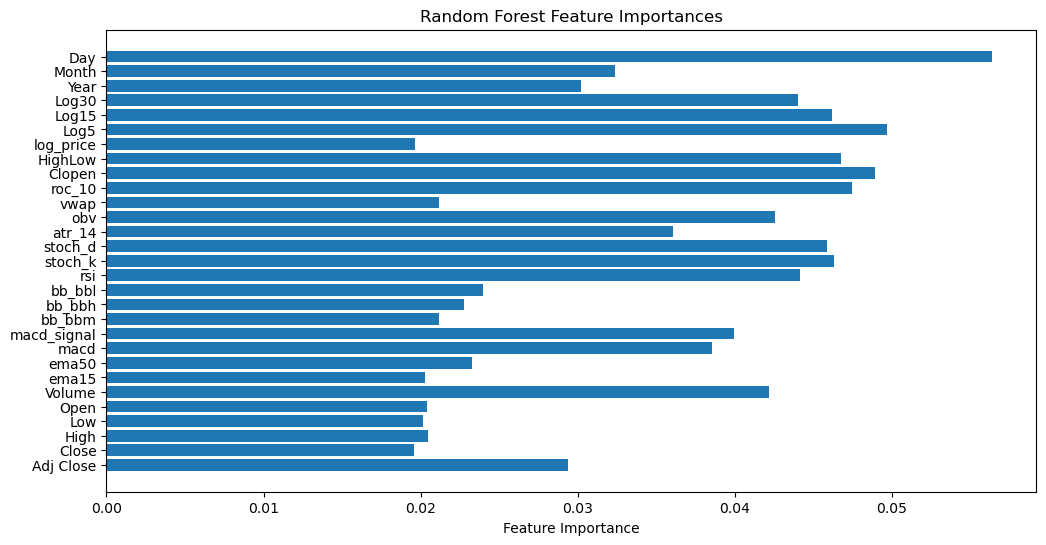

In [12]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,         # number of trees in the forest
    max_depth=20,
    max_features='sqrt',      # good default for RF
    min_samples_leaf=4,
    min_samples_split=10,
)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (RF): {test_accuracy}")

train_y_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_y_pred)
print(f"Train Accuracy (RF): {train_accuracy}")

importances = rf_classifier.feature_importances_
print("features")
features = X.columns
plt.figure(figsize=(12, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.show()

In [79]:
stock_data = pd.read_csv('./merged_data.csv')
stock_data = stock_data.dropna()
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day
stock_data = stock_data.drop('Date', axis=1)
stock_data = stock_data.drop('Symbol', axis=1)
stock_data = stock_data.drop('Ticker', axis=1)
stock_data = stock_data.drop('Target', axis=1)

X = stock_data.drop(['Pct_Change'], axis=1)
y = stock_data['Pct_Change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [80]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

threshold = 0.005  # 0.5%

profitable_predictions = (y_pred > threshold)
num_trades = profitable_predictions.sum()
returns = y_test[profitable_predictions]
quants = np.quantile(returns, [0, 0.05, 0.5, .95, 1])
normalized_returns = []
for i in returns:
    if i > quants[1] and i < quants[3]:
        normalized_returns.append(i)

avg_actual_return = y_test[profitable_predictions].mean()
avg_selected_returns = sum(normalized_returns) / len(normalized_returns)

print(f"Number of selected trades: {num_trades}")
print(f"Number of middle 90% trades: {len(normalized_returns)}")
print(f"Avg return on all selected trades: {avg_actual_return:.4f}")
print(f"Avg return on filtered selected trades: {avg_selected_returns:.4f}")
print(y_test[profitable_predictions].max())
print(y_test[profitable_predictions].min())

MSE: 0.00041224929719852724
MAE: 0.0131
RMSE: 0.0203
R² Score: 0.0017
Number of selected trades: 951
Number of middle 90% trades: 855
Avg return on all selected trades: 0.0103
Avg return on filtered selected trades: 0.0100
0.2532277963749201
-0.3481308819893823


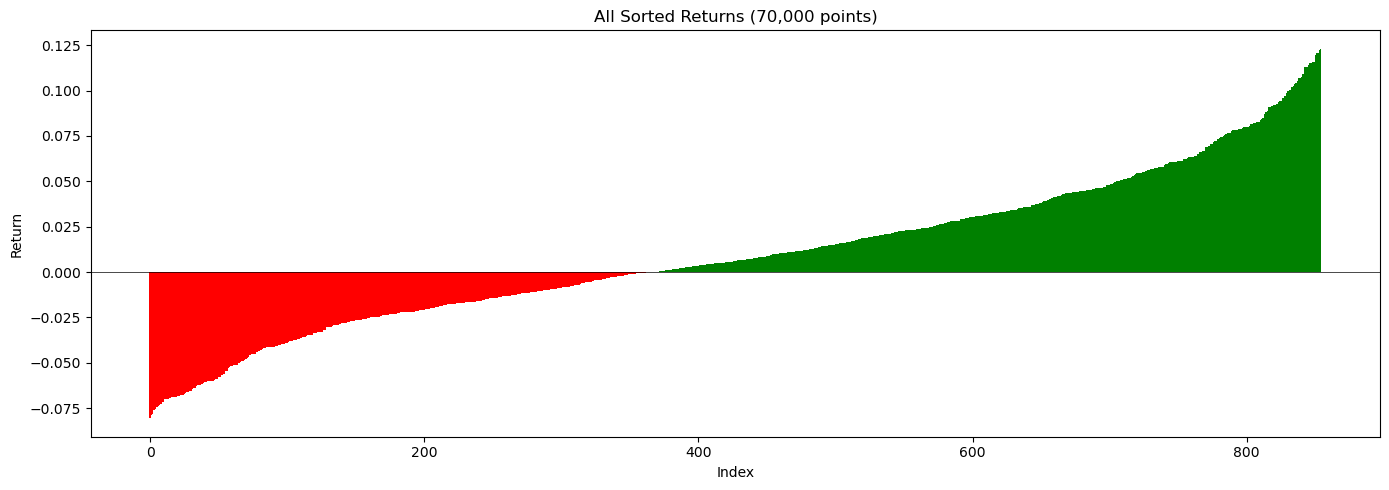

In [81]:
sorted_indices = np.argsort(normalized_returns)
sorted_returns = np.array(normalized_returns)[sorted_indices]
# Assign colors based on positive or negative value
colors = ['green' if val >= 0 else 'red' for val in sorted_returns]

# Plot
plt.figure(figsize=(14, 5))
plt.bar(np.arange(len(sorted_returns)), sorted_returns, color=colors, width=1.0)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('All Sorted Returns (70,000 points)')
plt.xlabel('Index')
plt.ylabel('Return')
plt.tight_layout()
plt.show()

In [82]:
threshold = -0.005  # 0.5%

loss_predictions = (y_pred < threshold)
num_trades = loss_predictions.sum()
returns = y_test[loss_predictions]
quants = np.quantile(returns, [0, 0.05, 0.5, .95, 1])
normalized_returns = []
for i in returns:
    if i > quants[1] and i < quants[3]:
        normalized_returns.append(i)

avg_actual_return = y_test[loss_predictions].mean()
avg_selected_returns = sum(normalized_returns) / len(normalized_returns)

print(f"Number of selected losing trades: {num_trades}")
print(f"Number of middle 90% trades: {len(normalized_returns)}")
print(f"Avg return on all selected trades: {avg_actual_return:.4f}")
print(f"Avg return on filtered selected trades: {avg_selected_returns:.4f}")
print(y_test[loss_predictions].max())
print(y_test[loss_predictions].min())

Number of selected losing trades: 162
Number of middle 90% trades: 144
Avg return on all selected trades: -0.0046
Avg return on filtered selected trades: -0.0028
0.1113019849289082
-0.1888079307404959


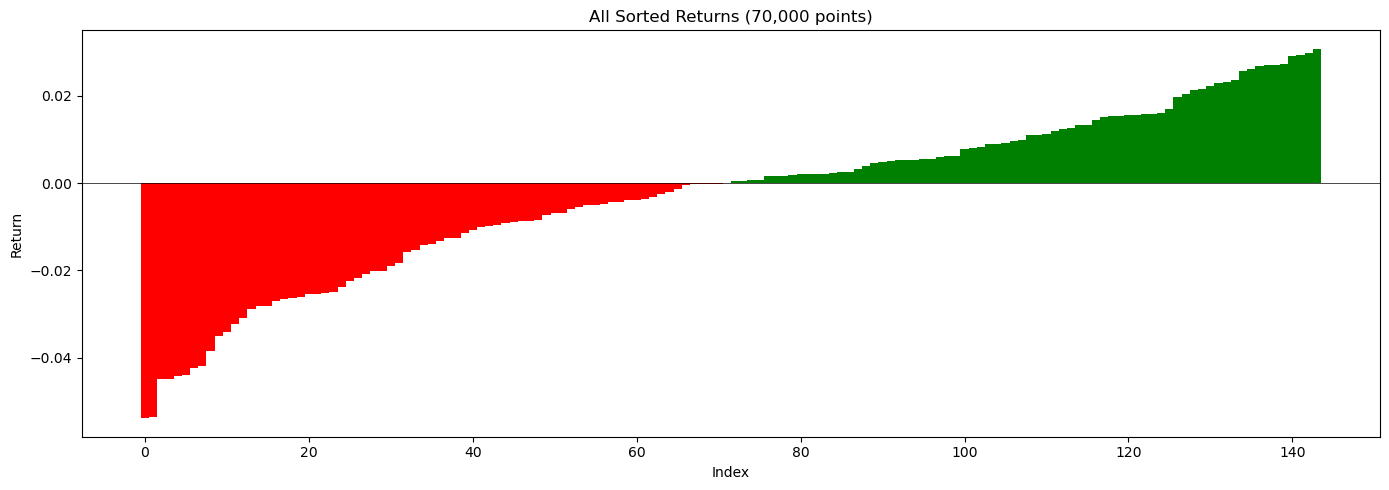

In [84]:
sorted_indices = np.argsort(normalized_returns)
sorted_returns = np.array(normalized_returns)[sorted_indices]
# Assign colors based on positive or negative value
colors = ['green' if val >= 0 else 'red' for val in sorted_returns]

# Plot
plt.figure(figsize=(14, 5))
plt.bar(np.arange(len(sorted_returns)), sorted_returns, color=colors, width=1.0)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('All Sorted Returns (70,000 points)')
plt.xlabel('Index')
plt.ylabel('Return')
plt.tight_layout()
plt.show()

In [48]:
print(len(y_pred[(y_pred > 0)]))
print(len(y_pred[(y_pred < 0)]))

126661
25645


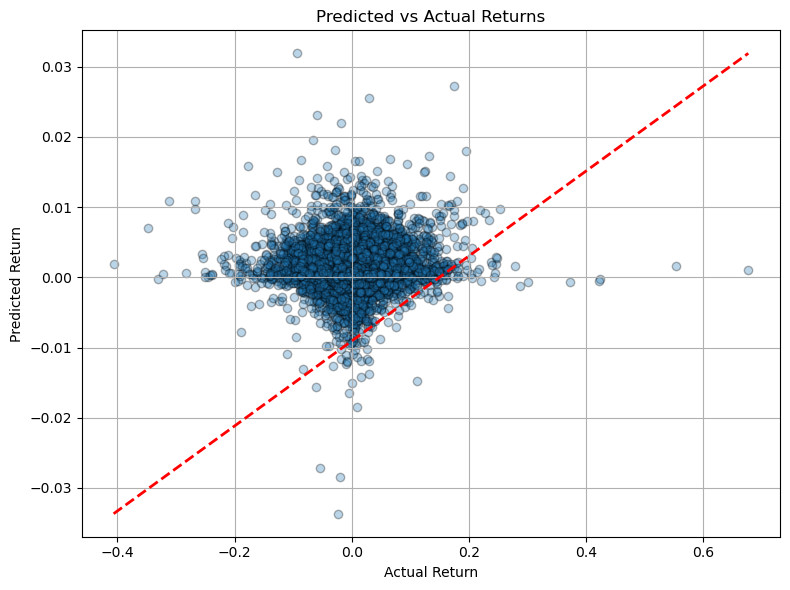

In [85]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'r--', lw=2)  # reference line
plt.xlabel("Actual Return")
plt.ylabel("Predicted Return")
plt.title("Predicted vs Actual Returns")
plt.grid(True)
plt.tight_layout()
plt.show()

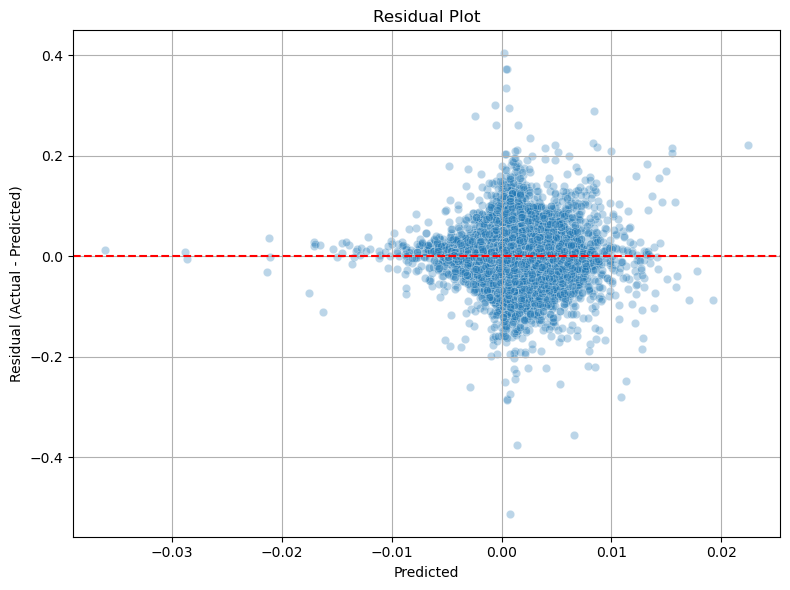

In [58]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

In [86]:
coefs = reg.coef_
feature_names = X_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df.head(10))

        Feature  Coefficient  Abs_Coefficient
20       Clopen    -0.039364         0.039364
21      HighLow     0.017300         0.017300
23         Log5    -0.008563         0.008563
25        Log30    -0.003943         0.003943
24        Log15    -0.001502         0.001502
3           Low     0.000714         0.000714
9   macd_signal    -0.000645         0.000645
8          macd     0.000589         0.000589
4          Open    -0.000559         0.000559
1         Close    -0.000555         0.000555


In [87]:
top_n = 10
top_features = coef_df['Feature'].head(top_n).values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [88]:
lr_top = LinearRegression()
lr_top.fit(X_train_top, y_train)
y_pred_top = lr_top.predict(X_test_top)

In [89]:
mse = mean_squared_error(y_test, y_pred_top)
mae = mean_absolute_error(y_test, y_pred_top)
rmse = mean_squared_error(y_test, y_pred_top, squared=False)
r2 = r2_score(y_test, y_pred_top)
print(f"MSE: {mse}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

threshold = 0.005  # 0.5%

profitable_predictions = (y_pred_top > threshold)
num_trades = profitable_predictions.sum()
returns = y_test[profitable_predictions]
quants = np.quantile(returns, [0, 0.05, 0.5, .95, 1])
normalized_returns = []
for i in returns:
    if i > quants[1] and i < quants[3]:
        normalized_returns.append(i)

avg_actual_return = y_test[profitable_predictions].mean()
avg_selected_returns = sum(normalized_returns) / len(normalized_returns)

print(f"Number of selected trades: {num_trades}")
print(f"Number of middle 90% trades: {len(normalized_returns)}")
print(f"Avg return on all selected trades: {avg_actual_return:.4f}")
print(f"Avg return on filtered selected trades: {avg_selected_returns:.4f}")
print(y_test[profitable_predictions].max())
print(y_test[profitable_predictions].min())

MSE: 0.00041250012672828975
MAE: 0.0131
RMSE: 0.0203
R² Score: 0.0010
Number of selected trades: 438
Number of middle 90% trades: 394
Avg return on all selected trades: 0.0119
Avg return on filtered selected trades: 0.0129
0.2532277963749201
-0.3481308819893823


Now to predict the last 5 months of a stock and show performance

In [59]:
stock_data = pd.read_csv('./merged_data.csv')
stock_data = stock_data.dropna()
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Day'] = stock_data['Date'].dt.day
stock_data = stock_data.drop('Date', axis=1)
stock_data = stock_data.drop('Symbol', axis=1)
stock_data = stock_data.drop('Ticker', axis=1)
stock_data = stock_data.drop('Target', axis=1)

X = stock_data.drop(['Pct_Change'], axis=1)
y = stock_data['Pct_Change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

MSE: 0.0003093961380119802


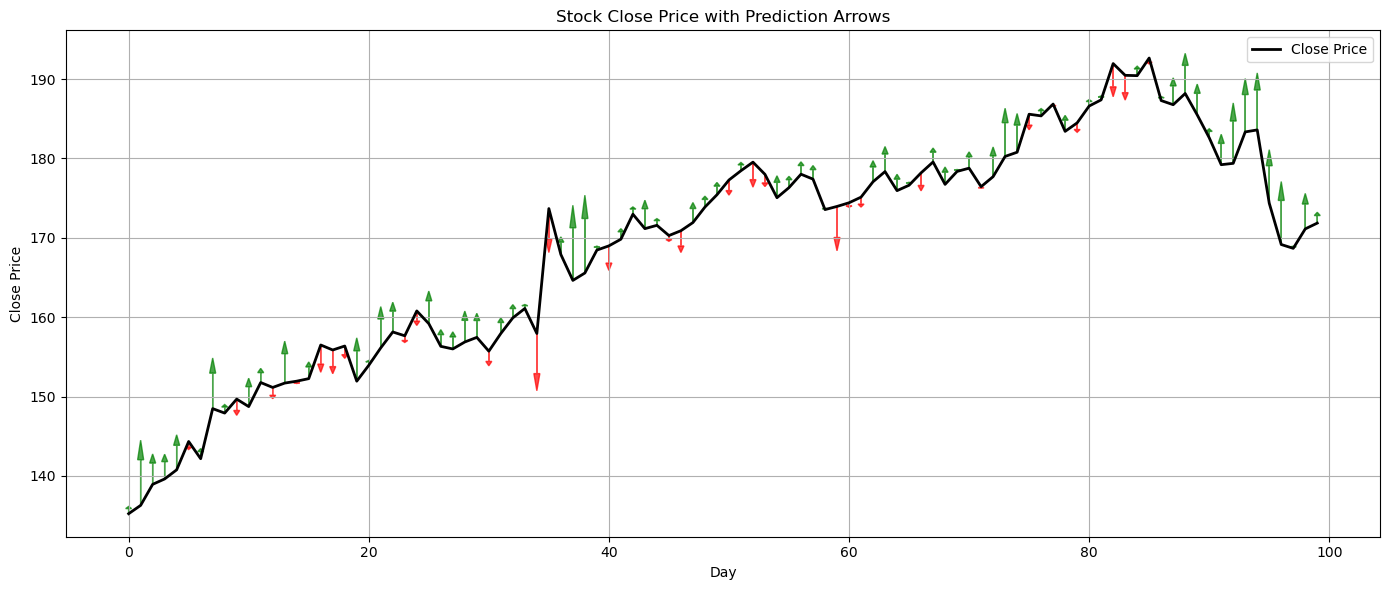

In [60]:
test_stock_data = pd.read_csv('./clean_data/GOOG.csv')
test_stock_data = test_stock_data.dropna()
test_stock_data['Date'] = pd.to_datetime(test_stock_data['Date'])
test_stock_data['Year'] = test_stock_data['Date'].dt.year
test_stock_data['Month'] = test_stock_data['Date'].dt.month
test_stock_data['Day'] = test_stock_data['Date'].dt.day
test_stock_data = test_stock_data.drop('Date', axis=1)
test_stock_data = test_stock_data.drop('Symbol', axis=1)
test_stock_data = test_stock_data.drop('Target', axis=1)
reg = LinearRegression()
reg.fit(X_train, y_train)

X_test = test_stock_data.drop(['Pct_Change'], axis=1)
y_test = test_stock_data['Pct_Change'][-200:-100]

y_pred = reg.predict(X_test[-200:-100])
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")


x = np.arange(100)  # x-axis as index
y = X_test['Close'][-200:-100].to_numpy() # closing prices
plt.figure(figsize=(14, 6))
plt.plot(x, y, label='Close Price', color='black', linewidth=2)

# Add arrows
for i in range(len(x)):
    arrow_length = y_pred[i] * 5000  # Scale to make arrows visible
    color = 'green' if y_pred[i] > 0 else 'red'
    
    plt.arrow(
        x[i], y[i],
        0, arrow_length,  # dx = 0, dy = scaled prediction
        color=color,
        head_width=0.5,
        head_length=abs(arrow_length) * 0.3,
        length_includes_head=True,
        alpha=0.7
    )

plt.title('Stock Close Price with Prediction Arrows')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

MSE: 0.00024433025353551156


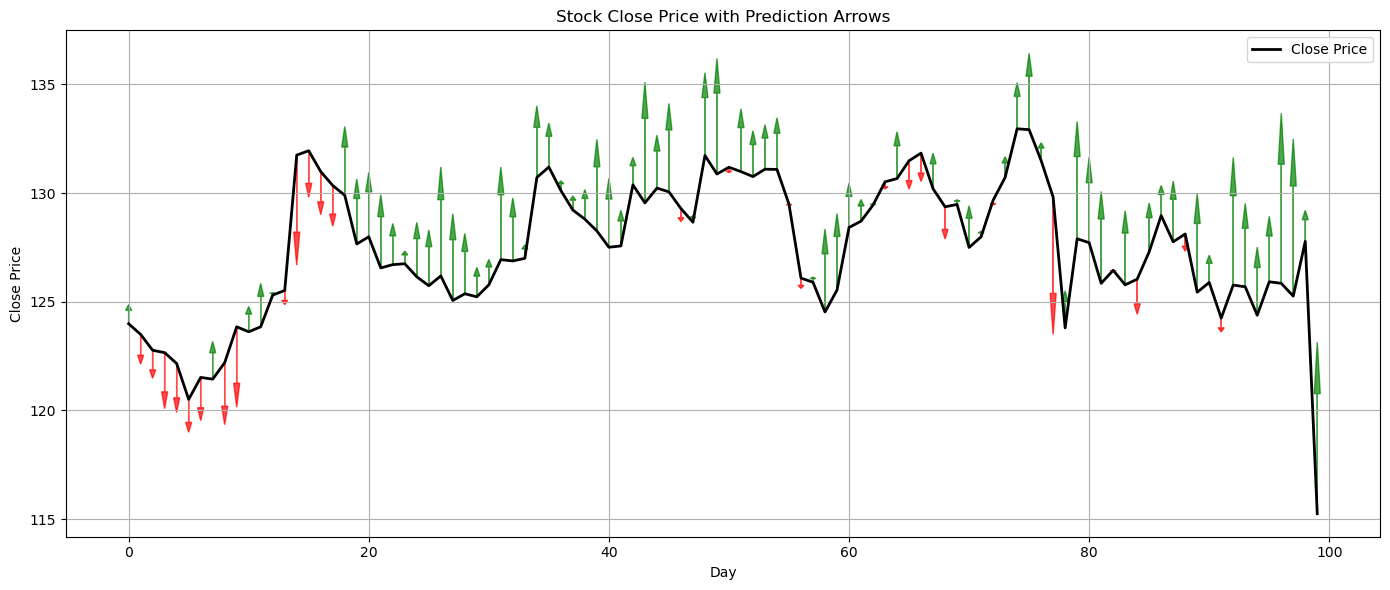

In [ ]:
test_stock_data = pd.read_csv('./clean_data/MRK.csv')
test_stock_data = test_stock_data.dropna()
test_stock_data['Date'] = pd.to_datetime(test_stock_data['Date'])
test_stock_data['Year'] = test_stock_data['Date'].dt.year
test_stock_data['Month'] = test_stock_data['Date'].dt.month
test_stock_data['Day'] = test_stock_data['Date'].dt.day
test_stock_data = test_stock_data.drop('Date', axis=1)
test_stock_data = test_stock_data.drop('Symbol', axis=1)
test_stock_data = test_stock_data.drop('Target', axis=1)
reg = LinearRegression()
reg.fit(X_train, y_train)

X_test = test_stock_data.drop(['Pct_Change'], axis=1)
y_test = test_stock_data['Pct_Change'][-200:-100]

y_pred = reg.predict(X_test[-200:-100])

x = np.arange(100)  # x-axis as index
y = X_test['Close'][-200:-100].to_numpy() # closing prices
plt.figure(figsize=(14, 6))
plt.plot(x, y, label='Close Price', color='black', linewidth=2)

# Add arrows
for i in range(len(x)):
    arrow_length = y_pred[i] * 5000  # Scale to make arrows visible
    color = 'green' if y_pred[i] > 0 else 'red'
    
    plt.arrow(
        x[i], y[i],
        0, arrow_length,  # dx = 0, dy = scaled prediction
        color=color,
        head_width=0.5,
        head_length=abs(arrow_length) * 0.3,
        length_includes_head=True,
        alpha=0.7
    )

plt.title('Stock Close Price with Prediction Arrows')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

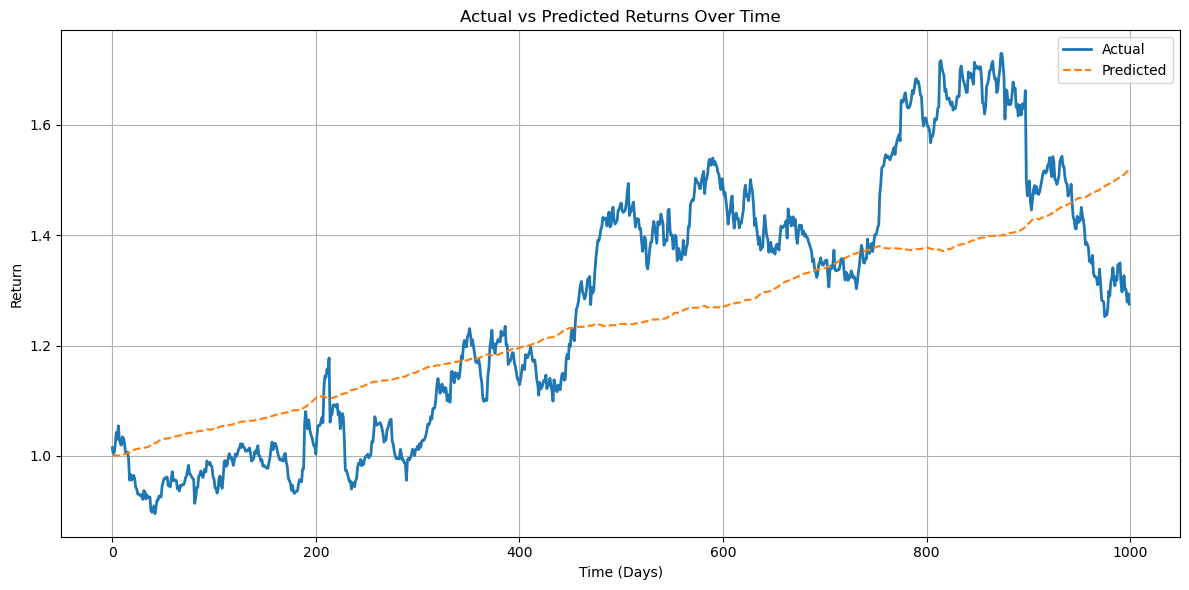

In [64]:
test_stock_data = pd.read_csv('./clean_data/MRK.csv')
test_stock_data = test_stock_data.dropna()
test_stock_data['Date'] = pd.to_datetime(test_stock_data['Date'])
test_stock_data['Year'] = test_stock_data['Date'].dt.year
test_stock_data['Month'] = test_stock_data['Date'].dt.month
test_stock_data['Day'] = test_stock_data['Date'].dt.day
test_stock_data = test_stock_data.drop('Date', axis=1)
test_stock_data = test_stock_data.drop('Symbol', axis=1)
test_stock_data = test_stock_data.drop('Target', axis=1)
reg = LinearRegression()
reg.fit(X_train, y_train)

X_test = test_stock_data.drop(['Pct_Change'], axis=1)

y_test = test_stock_data['Pct_Change'][-1000:]

y_pred = reg.predict(X_test[-1000:])

actual_cumulative = (1 + y_test).cumprod()
predicted_cumulative = (1 + y_pred).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(actual_cumulative.values, label="Actual", linewidth=2)
plt.plot(predicted_cumulative, label="Predicted", linestyle='--')
plt.title("Actual vs Predicted Returns Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

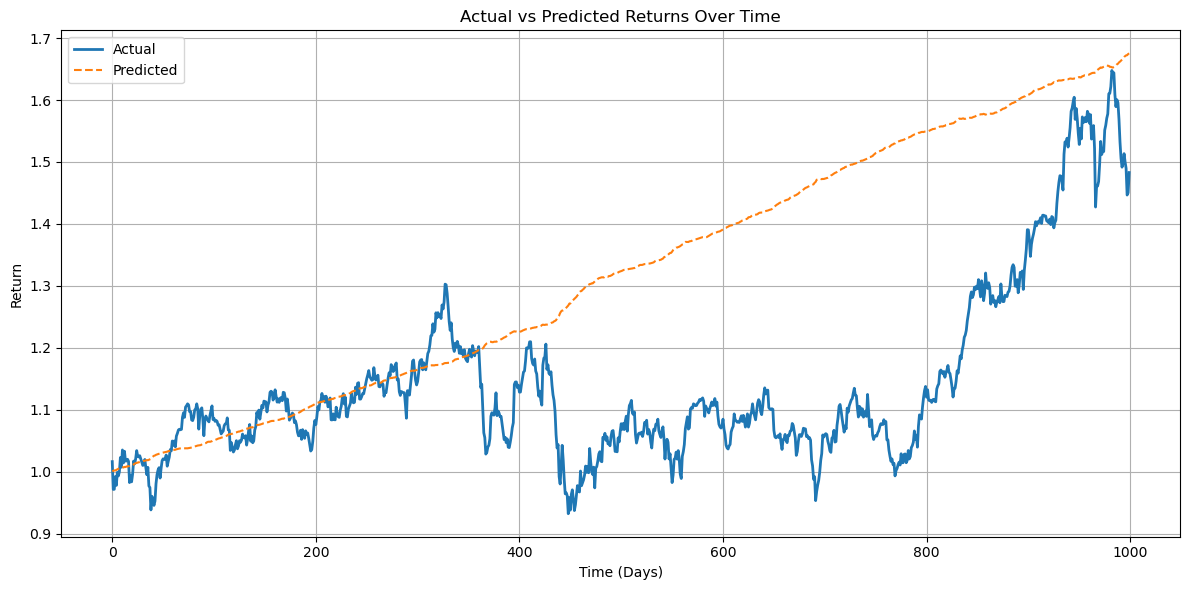

In [65]:
test_stock_data = pd.read_csv('./clean_data/PEG.csv')
test_stock_data = test_stock_data.dropna()
test_stock_data['Date'] = pd.to_datetime(test_stock_data['Date'])
test_stock_data['Year'] = test_stock_data['Date'].dt.year
test_stock_data['Month'] = test_stock_data['Date'].dt.month
test_stock_data['Day'] = test_stock_data['Date'].dt.day
test_stock_data = test_stock_data.drop('Date', axis=1)
test_stock_data = test_stock_data.drop('Symbol', axis=1)
test_stock_data = test_stock_data.drop('Target', axis=1)
reg = LinearRegression()
reg.fit(X_train, y_train)

X_test = test_stock_data.drop(['Pct_Change'], axis=1)

y_test = test_stock_data['Pct_Change'][-1000:]

y_pred = reg.predict(X_test[-1000:])

actual_cumulative = (1 + y_test).cumprod()
predicted_cumulative = (1 + y_pred).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(actual_cumulative.values, label="Actual", linewidth=2)
plt.plot(predicted_cumulative, label="Predicted", linestyle='--')
plt.title("Actual vs Predicted Returns Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

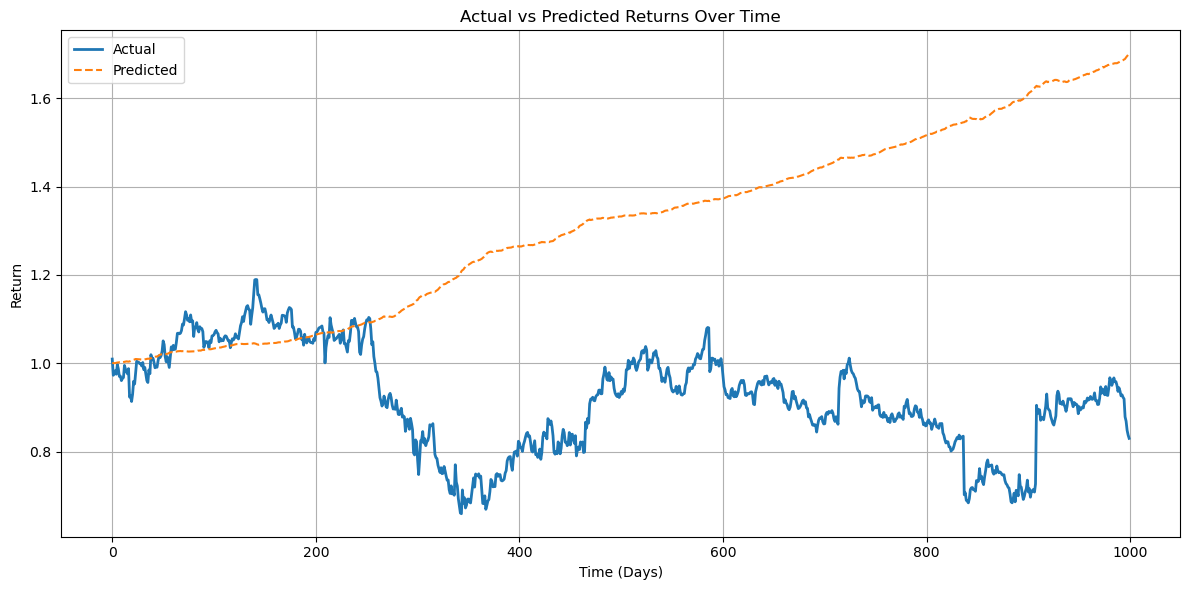

In [ ]:
test_stock_data = pd.read_csv('./clean_data/SBUX.csv')
test_stock_data = test_stock_data.dropna()
test_stock_data['Date'] = pd.to_datetime(test_stock_data['Date'])
test_stock_data['Year'] = test_stock_data['Date'].dt.year
test_stock_data['Month'] = test_stock_data['Date'].dt.month
test_stock_data['Day'] = test_stock_data['Date'].dt.day
test_stock_data = test_stock_data.drop('Date', axis=1)
test_stock_data = test_stock_data.drop('Symbol', axis=1)
test_stock_data = test_stock_data.drop('Target', axis=1)
reg = LinearRegression()
reg.fit(X_train, y_train)

X_test = test_stock_data.drop(['Pct_Change'], axis=1)

y_test = test_stock_data['Pct_Change'][-1000:]

y_pred = reg.predict(X_test[-1000:])

actual_cumulative = (1 + y_test).cumprod()
predicted_cumulative = (1 + y_pred).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(actual_cumulative.values, label="Actual", linewidth=2)
plt.plot(predicted_cumulative, label="Predicted", linestyle='--')
plt.title("Actual vs Predicted Returns Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()